Oktoberfest Dataset

1. Data preapration
2. Data visualisation

1.Data Preparation

In [1]:
!pip install kaggle 

In [2]:
import kaggle

In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [4]:
api = KaggleApi()
api.authenticate()

In [5]:
api.dataset_download_file("lucafrance/oktoberfest", file_name = "oktoberfest.csv")

False

In [6]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('oktoberfest.csv')
df.head()

,year,duration,guests_total,guests_daily,beer_price,beer_consumption,roast_chicken_price,roast_chicken_consumption
0,1985,16,7.1,444,3.20,54541,4.77,629520
1,1986,16,6.7,419,3.30,53807,3.92,698137
2,1987,16,6.5,406,3.37,51842,3.98,732859
3,1988,16,5.7,356,3.45,50951,4.19,720139
4,1989,16,6.2,388,3.60,51241,4.22,775674


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       35 non-null     int64  
 1   duration                   35 non-null     int64  
 2   guests_total               35 non-null     float64
 3   guests_daily               35 non-null     int64  
 4   beer_price                 35 non-null     float64
 5   beer_consumption           35 non-null     int64  
 6   roast_chicken_price        35 non-null     float64
 7   roast_chicken_consumption  35 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 2.3 KB


In [9]:
df.describe() # Descriptive statistic

,year,duration,guests_total,guests_daily,beer_price,beer_consumption,roast_chicken_price,roast_chicken_consumption
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2002.000000,16.285714,6.314286,388.171429,6.870571,62223.371429,7.592000,571920.714286
std,10.246951,0.621735,0.390432,26.337723,2.581078,10229.542414,2.621272,123620.418372
min,1985.000000,16.000000,5.500000,329.000000,3.200000,48698.000000,3.920000,351705.000000
25%,1993.500000,16.000000,6.050000,369.000000,4.800000,53214.500000,5.295000,482005.000000
50%,2002.000000,16.000000,6.400000,394.000000,6.750000,61163.000000,8.120000,521872.000000
75%,2010.500000,16.000000,6.500000,406.000000,8.940000,70203.000000,9.715000,689689.500000
max,2019.000000,18.000000,7.100000,444.000000,11.710000,79225.000000,12.150000,807710.000000


In [10]:

df['guests_total_k'] = df['guests_total'] * 1000

In [11]:
df['beer_inflation_yearly'] = df['beer_price'].pct_change()
df['beer_inflation_yearly'] *= 100
df['beer_inflation_yearly'] = round(df['beer_inflation_yearly'], 1)

df['chicken_inflation_yearly'] = df['roast_chicken_price'].pct_change()
df['chicken_inflation_yearly'] *= 100
df['chicken_inflation_yearly'] = round(df['chicken_inflation_yearly'], 1)

beer_price_diff = df['beer_price'] - 3.20
df['beer_inflation_total'] = (beer_price_diff / 3.20) * 100
df['beer_inflation_total'] = round(df['beer_inflation_total'], 1)

chicken_price_diff = df['roast_chicken_price'] - 4.77
df['chicken_inflation_total'] = (chicken_price_diff / 4.77) * 100
df['chicken_inflation_total'] = round(df['chicken_inflation_total'], 1)

2.Data Visualisation

In [12]:
plt.style.use('ggplot')

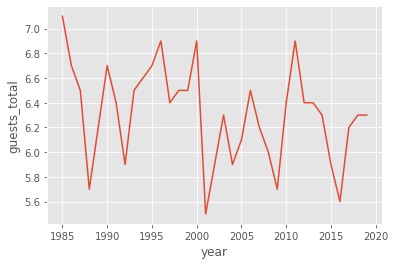

In [13]:
sns.lineplot(data=df, x='year', y='guests_total')
plt.show()

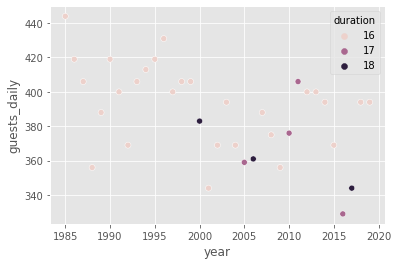

In [14]:
sns.scatterplot(data=df, x='year', y='guests_daily', hue='duration')
plt.show()

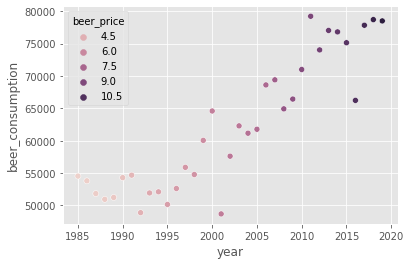

In [15]:
sns.scatterplot(data=df, x='year', y='beer_consumption', hue='beer_price')
plt.show()

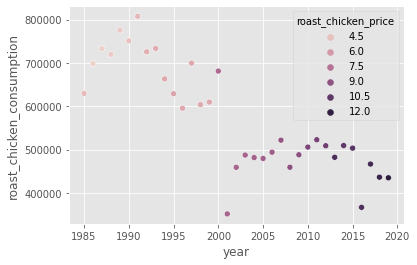

In [16]:
sns.scatterplot(data=df, x='year', y='roast_chicken_consumption', hue='roast_chicken_price')
plt.show()

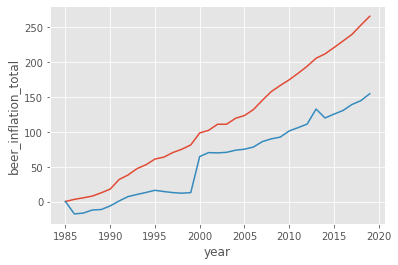

In [17]:
sns.lineplot(data=df, x='year', y='beer_inflation_total')
sns.lineplot(data=df, x='year', y='chicken_inflation_total')
plt.show()

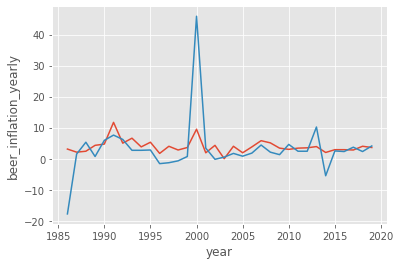

In [18]:
sns.lineplot(data=df, x='year', y='beer_inflation_yearly')
sns.lineplot(data=df, x='year', y='chicken_inflation_yearly')
plt.show()

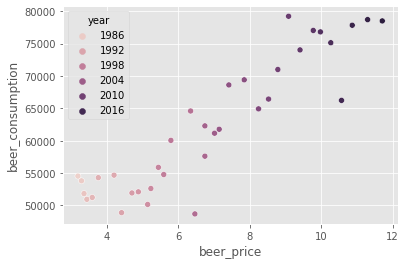

In [19]:
sns.scatterplot(data=df, x='beer_price', y='beer_consumption', hue='year')
plt.show()

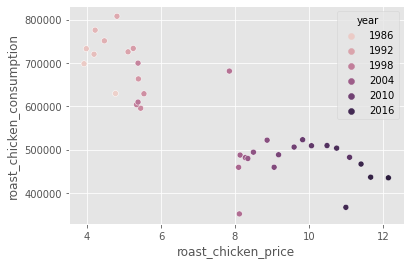

In [20]:
sns.scatterplot(data=df, x='roast_chicken_price', y='roast_chicken_consumption', hue='year')
plt.show()

The beer price is increasing at a regular rate, however chicken price fluctuate a lot.

The price of the beer does not seem to influence the consumption. They both increase with time. However the chicken consumption dropped a lot after a sharp increase in 2000